# Analyse Exploratoire

### Import des modules

In [1215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [1216]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [1217]:
# On regarde comment un batiment est d√©fini dans ce jeu de donn√©es 
building_consumption.head()


OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [1218]:
building_consumption.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'Comments',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

Les deux variables cibles √† pr√©dire :

SiteEnergyUseWN(kBtu) = consommation totale d‚Äô√©nergie ind√©pendamment de la m√©t√©o

TotalGHGEmissions = √©missions totales de gaz √† effet de serre (en tonnes de CO‚ÇÇ)

In [1219]:
# On v√©rifie qu'on a bien uniquement l'ann√©e 2016 dans les donn√©es
building_consumption['DataYear'].unique()

array([2016])

In [1220]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Comme le pr√©cise le cahier des charges, le projet porte exclusivement sur les b√¢timents non r√©sidentiels.

Nous allons donc filtr√© la colonne BuildingType pour ne garder que : 
    'NonResidential',
    'Nonresidential COS',
    'Nonresidential WA',
    'SPS-District K-12',
    'Campus'

In [1221]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Plusieurs colonnes du jeu de donn√©es pr√©sentaient un taux de valeurs manquantes sup√©rieur √† 80 %.
Ces variables (Comments, Outlier, YearsENERGYSTARCertified, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA) seront donc supprim√©es, car elles ne contiennent pas suffisamment d‚Äôinformations exploitables pour l‚Äôanalyse ou la mod√©lisation.

Les autres colonnes partiellement incompl√®tes ont √©t√© conserv√©es pour traitement ult√©rieur, car elles apportent des informations potentiellement pertinentes (ex. ENERGYSTARScore, SecondLargestPropertyUseType, etc.).

#### TERMINER L'ANALYSE EXPLORATOIRE 

A r√©aliser : 
- Une analyse descriptive des donn√©es, y compris une explication du sens des colonnes gard√©es, des arguments derri√®re la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorit√© de valeurs manquantes ou constantes en utilisant la m√©thode value_counts() de Pandas
* Mettre en evidence les diff√©rences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu coh√©rentes d'un point de vue m√©tier 

Pour vous inspirer, ou comprendre l'esprit recherch√© dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un mod√®le √† suivre √† la lettre ni d'un template d'analyses attendues pour ce projet. 

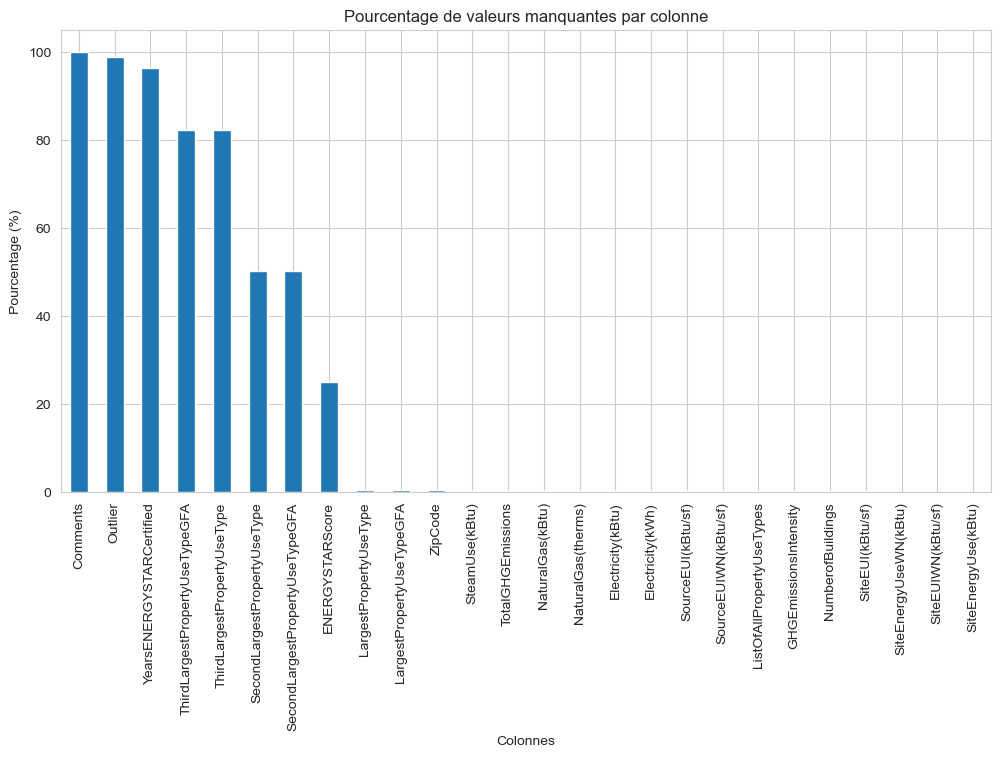

In [1222]:
# On regarde le pourcentage de valeurs manquantes par colonne
missing_percentage = building_consumption.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Pourcentage de valeurs manquantes par colonne')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Colonnes')
plt.show()

Comme dit dans l'analyse exploratoire, nous allons supprimer certaines colonnes car trop de valeurs manquantes

In [1223]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'Comments',
    'YearsENERGYSTARCertified',
    'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA'
]
building_consumption.drop(columns=cols_to_drop, inplace=True)
print('Nombre de colonnes apr√®s suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 46
Nombre de colonnes apr√®s suppression : 42


Maintenant on garde uniquement les structures non r√©sidentiels pour √™tre en accord avec le cahier des charges de la ville

In [1224]:
print('Nombre de lignes avant filtrage :', building_consumption.shape[0])
to_keep = [
    'NonResidential',         # B√¢timents purement non r√©sidentiels (ceux vis√©s par le projet)
    'Nonresidential COS',     # B√¢timents municipaux non r√©sidentiels appartenant √† la City of Seattle
    'Nonresidential WA',      # B√¢timents non r√©sidentiels de l'√âtat de Washington
    'SPS-District K-12',      # √âcoles publiques (Seattle Public Schools), incluses car non r√©sidentielles
    'Campus'                  # Ensembles de b√¢timents √† usage collectif (universit√©s, h√¥pitaux, etc.)
]
building_consumption = building_consumption[building_consumption['BuildingType'].isin(to_keep)]
print('Nombre de lignes apr√®s filtrage :', building_consumption.shape[0])


Nombre de lignes avant filtrage : 3376
Nombre de lignes apr√®s filtrage : 1668


In [1225]:
# Ici on va voir tous les types d‚Äôusage rencontr√©s dans les Campus
campus_df = building_consumption[building_consumption["BuildingType"].str.lower() == "campus"]

campus_property_types = campus_df["ListOfAllPropertyUseTypes"]

campus_property_types = campus_property_types.dropna()

unique_types = (
    campus_property_types
    .str.split(",")              
    .explode()                   
    .str.strip()                 
    .dropna()
    .unique()
)

print("\nTous les types d‚Äôusage rencontr√©s dans les Campus :")
print(sorted(unique_types))



Tous les types d‚Äôusage rencontr√©s dans les Campus :
['Adult Education', 'Bar/Nightclub', 'College/University', 'Data Center', 'Energy/Power Station', 'Food Sales', 'K-12 School', 'Laboratory', 'Manufacturing/Industrial Plant', 'Multifamily Housing', 'Non-Refrigerated Warehouse', 'Office', 'Other', 'Other - Education', 'Other - Restaurant/Bar', 'Other - Utility', 'Parking', 'Pre-school/Daycare', 'Restaurant', 'Retail Store', 'Self-Storage Facility', 'Social/Meeting Hall', 'Supermarket/Grocery Store']


In [1226]:
# On remarque que certaines lignes contiennent "Multifamily Housing"
print(f"\nNombre de lignes avant suppression des r√©sidentielles : {len(building_consumption)}")
mask_residential = building_consumption["ListOfAllPropertyUseTypes"].str.contains("Multifamily Housing", case=False, na=False)
print(f"Nombre de lignes r√©sidentielles d√©tect√©es : {mask_residential.sum()}")

building_consumption = building_consumption[~mask_residential].copy()

print(f"apr√®s suppression : {len(building_consumption)}")



Nombre de lignes avant suppression des r√©sidentielles : 1668
Nombre de lignes r√©sidentielles d√©tect√©es : 39
apr√®s suppression : 1629


In [1227]:
# Suppression des colonnes qui n'ont qu'une seul valeur unique
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
print('Toutes les colonnes avec une seule valeur unique avec leurs valeurs :')
for col in cols_single_value:
    print(f" - {col} : {building_consumption[col].iloc[0]}")
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
nunique = building_consumption.nunique()
cols_single_value = nunique[nunique == 1].index.tolist()
building_consumption.drop(columns=cols_single_value, inplace=True)
print('Nombre de colonnes apr√®s suppression :', building_consumption.shape[1])

Toutes les colonnes avec une seule valeur unique avec leurs valeurs :
 - DataYear : 2016
 - City : Seattle
 - State : WA
Nombre de colonnes avant suppression : 42
Nombre de colonnes apr√®s suppression : 39


In [1228]:
print('Nombre de lignes apr√®s filtrage :', building_consumption.shape[0])
print('Nombre de colonnes apr√®s filtrage :', building_consumption.shape[1])

Nombre de lignes apr√®s filtrage : 1629
Nombre de colonnes apr√®s filtrage : 39


Je veux distinguer les b√¢timents √† usage unique de ceux qui ont plusieurs usages car un b√¢timent qui h√©berge plusieurs activit√©s a souvent :

1 / Une surface plus grande,

2 / Une consommation √©nerg√©tique plus √©lev√©e,

3 / Des √©missions de CO‚ÇÇ plus variables.

In [1229]:
# On commence par cr√©er une nouvelle variable IsMultiUse pour faire la distinction entre les b√¢timents √† usage unique et ceux √† usages multiples
# en cherchant la pr√©sence d‚Äôune virgule ','
building_consumption['IsMultiUse'] = building_consumption['ListOfAllPropertyUseTypes'].apply(lambda x: ',' in str(x))
building_consumption['IsMultiUse'].value_counts()

IsMultiUse
True     818
False    811
Name: count, dtype: int64

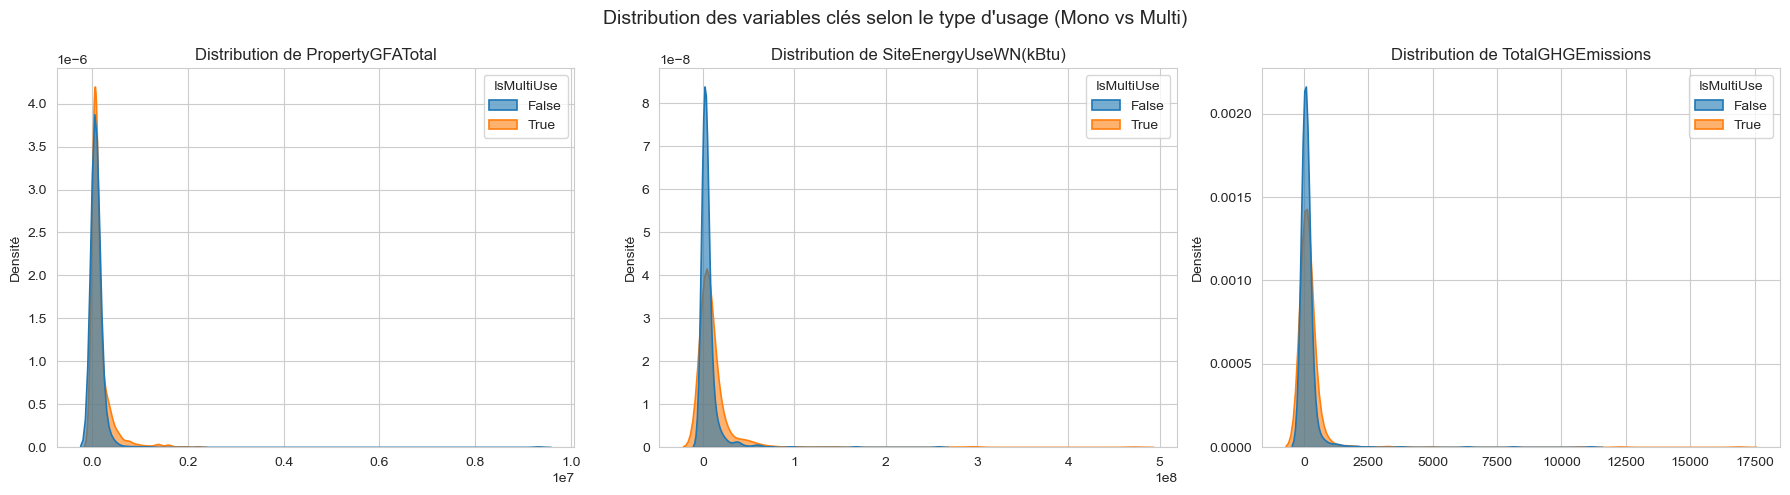

In [1230]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(cols):
    sns.kdeplot(
        data=building_consumption,
        x=col,
        hue='IsMultiUse',
        fill=True,
        common_norm=False,
        alpha=0.6,
        linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densit√©')

plt.suptitle("Distribution des variables cl√©s selon le type d'usage (Mono vs Multi)", fontsize=14)
plt.tight_layout()
plt.show()


1 / 
Les b√¢timents multi-usages sont globalement plus grands que les b√¢timents mono-usage.
Cela est logique : combiner plusieurs fonctions (bureaux, parking, commerces‚Ä¶) n√©cessite davantage d‚Äôespace.

2 / 
Les b√¢timents multi-usages consomment davantage d‚Äô√©nergie.
Cela s‚Äôexplique par :
leur plus grande taille,
la diversit√© des activit√©s h√©berg√©es (chauffage, √©clairage, froid, informatique, etc.),et une occupation plus continue (plus d‚Äôheures d‚Äôactivit√© cumul√©es).

3 / 
Les b√¢timents multi-usages sont √©galement plus √©metteurs de CO2, ce qui est coh√©rent avec leur niveau de consommation √©nerg√©tique.
On retrouve ici le m√™me sch√©ma que pour la variable pr√©c√©dente : taille + diversit√© = plus d‚Äô√©nergie consomm√©e et donc plus d‚Äô√©missions.

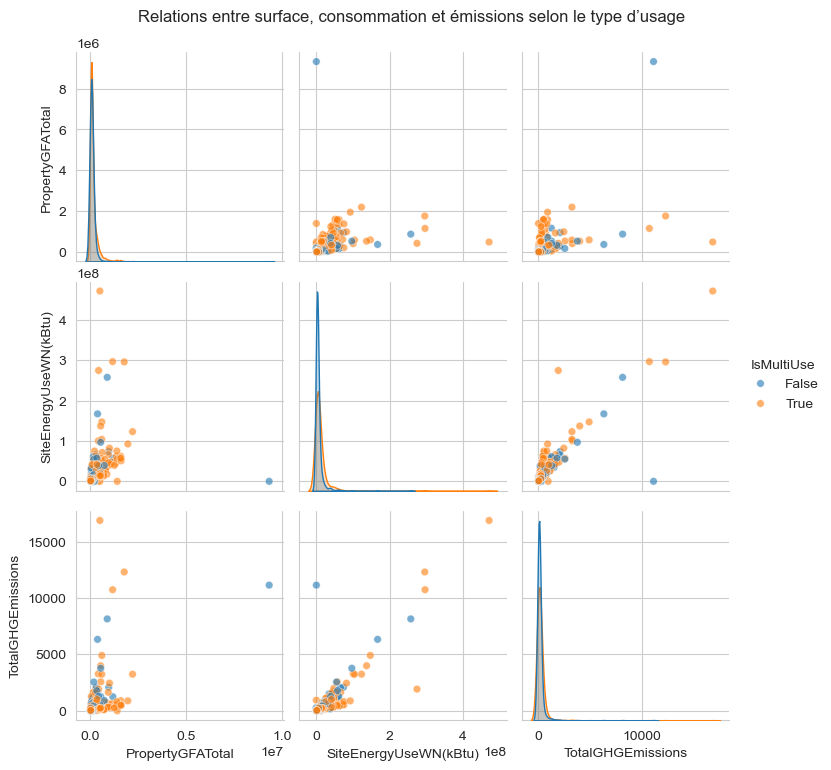

In [1231]:
# On compl√®te avec une pairplot pour visualiser les relations entre les trois variables quantitatives en fonction du type d‚Äôusage
sns.pairplot(
    building_consumption,
    vars=['PropertyGFATotal', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'],
    hue='IsMultiUse',
    plot_kws={'alpha':0.6, 's':30}
)
plt.suptitle("Relations entre surface, consommation et √©missions selon le type d‚Äôusage", y=1.02)
plt.show()


Ce pairplot met en √©vidence une forte coh√©rence structurelle entre les variables √©tudi√©es :

Les b√¢timents les plus vastes sont aussi les plus consommateurs et les plus √©metteurs.

Les b√¢timents multi-usages (en orange) se distinguent globalement par des valeurs plus √©lev√©es sur ces trois axes.

Quelques points isol√©s traduisent des situations extr√™mes mais plausibles (par exemple, h√¥pitaux ou data centers).

Ces observations confirment que :

la surface totale (PropertyGFATotal) est un pr√©dicteur essentiel,

la variable IsMultiUse est pertinente pour diff√©rencier les profils √©nerg√©tiques,

et les valeurs extr√™mes devront √™tre v√©rifi√©es mais probablement conserv√©es, car elles traduisent des cas r√©els importants pour la politique √©nerg√©tique de la ville.

# Mod√©lisation 

### Import des modules 

In [1232]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Mod√®les
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A r√©aliser : Enrichir le jeu de donn√©es actuel avec de nouvelles features issues de celles existantes. 

En r√®gle g√©n√©rale : On utilise la m√©thode .apply() de Pandas pour cr√©er une nouvelle colonne √† partir d'une colonne existante. N'h√©sitez pas √† regarder les exemples dans les chapitres de cours donn√©s en ressource

In [1233]:
# === CODE FEATURE ENGINEERING AVANC√â ===

# 1. √Çge du b√¢timent
building_consumption['BuildingAge'] = building_consumption['YearBuilt'].apply(lambda x: 2016 - x)

# 1bis. Classe d'√¢ge du b√¢timent
# <20 ans, 20-50 ans, >50 ans
def age_class(age):
    if age <= 20:
        return 'recent'
    elif age <= 50:
        return 'middle'
    else:
        return 'old'
building_consumption['BuildingAgeClass'] = building_consumption['BuildingAge'].apply(age_class)

# 2. Pr√©sence de parking
building_consumption['HasParking'] = building_consumption['PropertyGFAParking'].apply(lambda x: 1 if x > 0 else 0)

# 2bis. Part du parking dans le b√¢timent
building_consumption['ParkingRatio'] = building_consumption.apply(
    lambda row: row['PropertyGFAParking'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else 0,
    axis=1
)

# 3. Taille du b√¢timent
median_area = building_consumption['PropertyGFATotal'].median()
building_consumption['IsLargeBuilding'] = building_consumption['PropertyGFATotal'].apply(
    lambda x: 1 if x > median_area else 0
)

# 3bis. Surface moyenne par √©tage
building_consumption['AvgFloorArea'] = building_consumption.apply(
    lambda row: row['PropertyGFATotal'] / row['NumberofFloors']
    if row['NumberofFloors'] > 0 else np.nan,
    axis=1
)

# 3ter. Volume approximatif du b√¢timent
building_consumption['ApproxBuildingVolume'] = building_consumption['PropertyGFATotal'] * building_consumption['NumberofFloors']

# 4. Complexit√© d'usage
building_consumption['UseTypeCount'] = building_consumption['ListOfAllPropertyUseTypes'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) else 0
)

# 4bis. B√¢timent √† usage multiple
# Multi-usage = plus de 1 type d√©clar√©
building_consumption['IsMultiUse'] = building_consumption['UseTypeCount'].apply(lambda n: 1 if n > 1 else 0)

# 5. Intensit√© √©nerg√©tique
building_consumption['EnergyIntensity'] = building_consumption.apply(
    lambda row: row['SiteEnergyUseWN(kBtu)'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else np.nan,
    axis=1
)

# 5bis. Intensit√© d'√©missions
building_consumption['EmissionsIntensity'] = building_consumption.apply(
    lambda row: row['TotalGHGEmissions'] / row['PropertyGFATotal']
    if row['PropertyGFATotal'] > 0 else np.nan,
    axis=1
)

# 6. Ratio Gaz / √ânergie totale
building_consumption['GasShare'] = building_consumption.apply(
    lambda row: row['NaturalGas(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 7. Ratio √âlectricit√© / √ânergie totale
building_consumption['ElectricShare'] = building_consumption.apply(
    lambda row: row['Electricity(kBtu)'] / row['SiteEnergyUseWN(kBtu)']
    if row['SiteEnergyUseWN(kBtu)'] > 0 else 0,
    axis=1
)

# 8. Efficacit√© √©nerg√©tique d√©clar√©e
building_consumption['InefficiencyScore'] = building_consumption['ENERGYSTARScore'].apply(
    lambda x: 100 - x if pd.notnull(x) else np.nan
)

# 9. B√¢timent ancien
building_consumption['IsOldBuilding'] = building_consumption['BuildingAge'].apply(
    lambda x: 1 if x > 50 else 0
)

# 10.Distance au centre-ville de Seattle
# Centre g√©ographique approx de Seattle : lat=47.6062, lon=-122.3321
CENTER_LAT, CENTER_LON = 47.6062, -122.3321

def haversine_distance(lat, lon, ref_lat=CENTER_LAT, ref_lon=CENTER_LON):
    R = 6371  # km
    dlat = np.radians(lat - ref_lat)
    dlon = np.radians(lon - ref_lon)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(ref_lat))
        * np.cos(np.radians(lat))
        * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

building_consumption['DistanceFromCenter_km'] = building_consumption.apply(
    lambda row: haversine_distance(row['Latitude'], row['Longitude']),
    axis=1
)

# Nettoyage final des infinis / NaN cr√©√©s par les divisions
building_consumption.replace([np.inf, -np.inf], np.nan, inplace=True)

# Aper√ßu final
building_consumption.head()


OSEBuildingID    BuildingType PrimaryPropertyType  \
0              1  NonResidential               Hotel   
1              2  NonResidential               Hotel   
2              3  NonResidential               Hotel   
3              5  NonResidential               Hotel   
4              8  NonResidential               Hotel   

                  PropertyName          Address  ZipCode  \
0         Mayflower park hotel    405 Olive way  98101.0   
1              Paramount Hotel  724 Pine street  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  98101.0   
3                    HOTEL MAX   620 STEWART ST  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   ...  AvgFloorArea  ApproxBuildingVolume  UseTypeCount  EnergyIntensity  \
0  ...   7369.500000               1061208             1        84.321754   
1  ...   9415.090909               1139226             3        83.661424   
2  ...  23319.756098              39200510             1        77.331177   
3  ...   6132.000000                613200             1       113.287679   
4  ...   9754.444444               3160440             3        83.474786   

   EmissionsIntensity  GasShare  ElectricShare InefficiencyScore  \
0            0.002827  0.171177       0.529177              40.0   
1            0.002857  0.593813       0.374270              39.0   
2            0.002185  0.020204       0.669849              57.0   
3            0.004671  0.260726       0.398590              44.0   
4            0.002876  0.600689       0.366295              25.0   

  IsOldBuilding  DistanceFromCenter_km  
0             1               0.800050  
1             0               0.787077  
2             0               0.970109  
3             1               0.944139  
4             0               1.048092  

[5 rows x 55 columns]

Feature Engineering

De nouvelles variables ont √©t√© cr√©√©es afin d‚Äôenrichir le jeu de donn√©es et de mieux capter les caract√©ristiques structurelles et √©nerg√©tiques des b√¢timents :

BuildingAge : √¢ge du b√¢timent (2016 ‚Äì ann√©e de construction).

IsOldBuilding : indicateur binaire identifiant les b√¢timents de plus de 50 ans.

HasParking : d√©tection des b√¢timents disposant d‚Äôun espace de stationnement.

IsLargeBuilding : identifie les b√¢timents dont la surface d√©passe la m√©diane du jeu de donn√©es.

IsMultiUse et UseTypeCount : caract√©risent la complexit√© d‚Äôusage du b√¢timent.

EnergyIntensity : consommation d‚Äô√©nergie par unit√© de surface (kBtu/ft¬≤).

EmissionsIntensity : √©missions de GES par unit√© de surface.

Ces features permettront au mod√®le de mieux relier les caract√©ristiques physiques, structurelles et fonctionnelles des b√¢timents √† leurs niveaux de consommation √©nerg√©tique et d‚Äô√©missions de CO‚ÇÇ.

### Pr√©paration des features pour la mod√©lisation

A r√©aliser :
* Si ce n'est pas d√©j√† fait, supprimer toutes les colonnes peu pertinentes pour la mod√©lisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une d√©marche pour les supprimer.
* D√©barrassez-vous des features redondantes en utilisant une matrice de corr√©lation de Pearson. Pour cela, utiisez la m√©thode corr() de Pandas, coupl√© d'un graphique Heatmap de la librairie Seaborn 
* R√©alisez diff√©rents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features num√©riques n'est pas tr√®s √©lev√©).
* ¬†S√©parez votre jeu de donn√©es en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features cat√©gorielles, il faut les encoder pour que votre mod√®le fonctionne. Les deux m√©thodes d'encodage √† connaitre sont le OneHotEncoder et le LabelEncoder

## 1 / Supprimer toutes les colonnes peu pertinentes pour la mod√©lisation

In [1234]:
print('Nombre de colonnes avant suppression :', building_consumption.shape[1])
cols_to_drop = [
    'OSEBuildingID',                    # Identifiant unique (aucune valeur pr√©dictive)
    'PropertyName',                     # Nom du b√¢timent (texte non exploitable)
    'Address',                          # Adresse (texte, unique pour chaque ligne)
    'ZipCode',                          # Code postal : trop granulaire, peu informatif sans encodage spatial
    'TaxParcelIdentificationNumber',    # Identifiant administratif (aucun lien avec la consommation)
    'CouncilDistrictCode',              # Code politique, non pertinent pour la consommation √©nerg√©tique
    'Neighborhood',                     # Nom de quartier (texte, trop de cat√©gories)
    'DefaultData',                      # Donn√©e interne au dataset (bool√©en sans signification m√©tier)
    'ComplianceStatus',                 # Statut administratif (non explicatif)
    'PropertyGFABuilding(s)',           # Redondant avec PropertyGFATotal
    'ListOfAllPropertyUseTypes',        # D√©j√† r√©sum√© par IsMultiUse et UseTypeCount
    'LargestPropertyUseType',           # Texte, redondant avec PrimaryPropertyType
    'SecondLargestPropertyUseType',     # Peu renseign√© + redondant
    'SecondLargestPropertyUseTypeGFA'   # Corr√©l√© √† LargestPropertyUseTypeGFA et PropertyGFATotal
]

building_consumption = building_consumption.drop(columns=cols_to_drop)
print('Nombre de colonnes apr√®s suppression :', building_consumption.shape[1])

Nombre de colonnes avant suppression : 55
Nombre de colonnes apr√®s suppression : 41


## 2 / Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une d√©marche pour les supprimer.

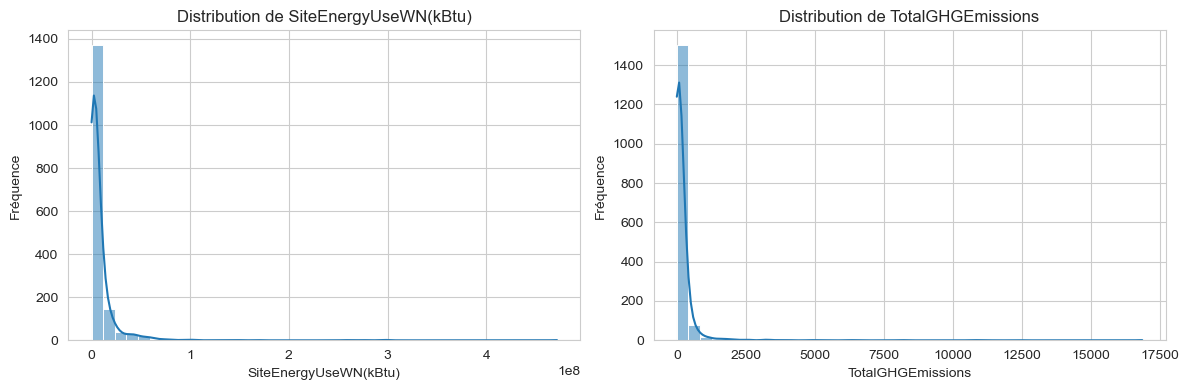

In [1235]:
# Analyse des distributions des variables cibles
targets = ['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions']

plt.figure(figsize=(12, 4))

for i, target in enumerate(targets):
    plt.subplot(1, 2, i+1)
    sns.histplot(building_consumption[target], kde=True, bins=40)
    plt.title(f"Distribution de {target}")
    plt.xlabel(target)
    plt.ylabel("Fr√©quence")

plt.tight_layout()
plt.show()

Pour SiteEnergyUseWN(kBtu) :

Distribution fortement asym√©trique √† droite.

Quelques b√¢timents consomment √©norm√©ment d‚Äô√©nergie (probablement des h√¥pitaux, campus, data centers).

Ces valeurs extr√™mes ne sont pas forc√©ment fausses, mais elles biaisent les mod√®les lin√©aires.

Pour TotalGHGEmissions :

M√™me sch√©ma : grande majorit√© avec faibles √©missions, quelques b√¢timents tr√®s polluants.

Corr√©l√©e √† la consommation, donc m√™me logique.

In [1236]:
# Suppression des outliers bas√©s sur les quantiles 1% et 99%
print('Nombre de lignes avant suppression des outliers :', building_consumption.shape[0])
for target in targets:
    q_low = building_consumption[target].quantile(0.01)
    q_high = building_consumption[target].quantile(0.99)
    building_consumption = building_consumption[
        (building_consumption[target] > q_low) & 
        (building_consumption[target] < q_high)
    ] 
    print(f"Apr√®s suppression des outliers pour {target} : {building_consumption.shape[0]} lignes restantes")

Nombre de lignes avant suppression des outliers : 1629
Apr√®s suppression des outliers pour SiteEnergyUseWN(kBtu) : 1584 lignes restantes
Apr√®s suppression des outliers pour TotalGHGEmissions : 1552 lignes restantes


## 3 / D√©barrassez-vous des features redondantes en utilisant une matrice de corr√©lation de Pearson. Pour cela, utiisez la m√©thode corr() de Pandas, coupl√© d'un graphique Heatmap de la librairie Seaborn 

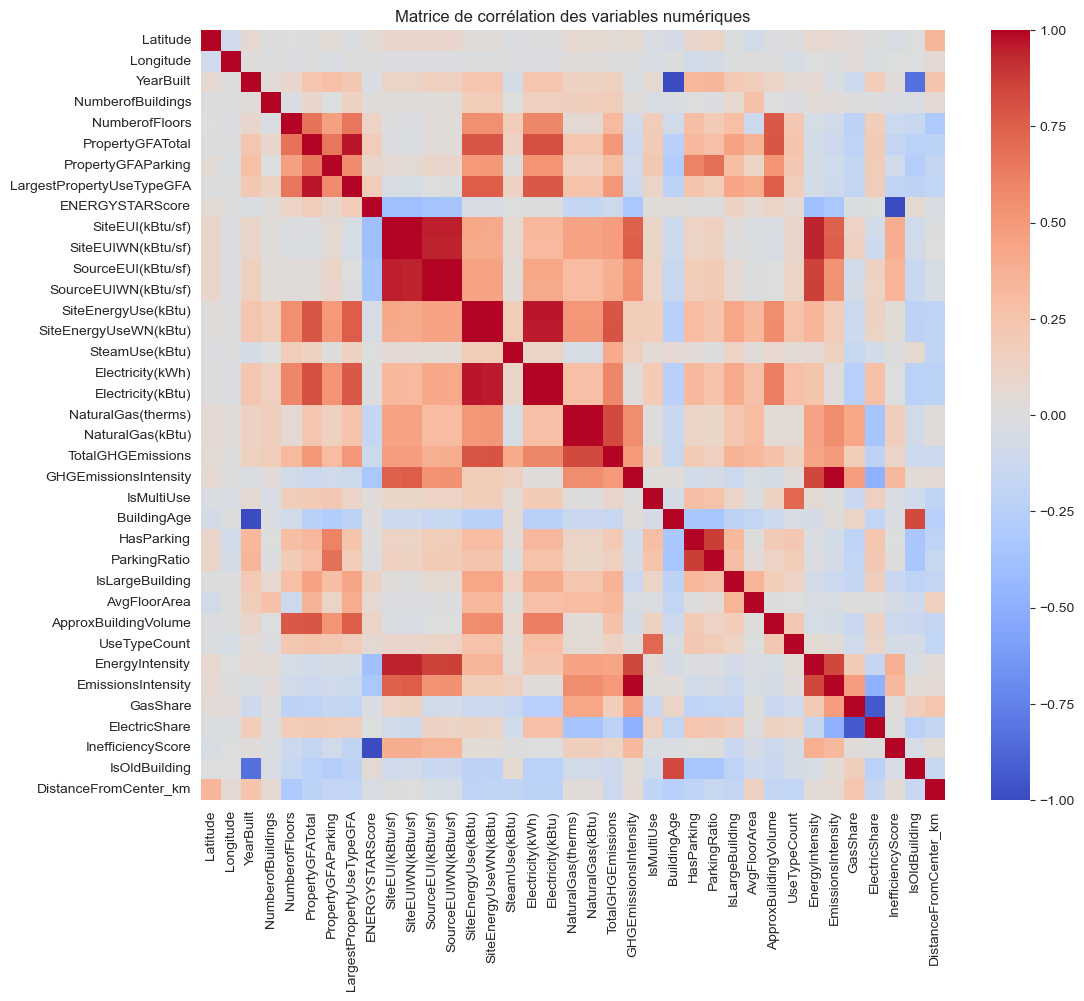

In [1237]:
corr = building_consumption.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Matrice de corr√©lation des variables num√©riques")
plt.show()

In [1238]:
print('Nombre de colonnes avant suppression des corr√©lations :', building_consumption.shape[1])
cols_to_drop_corr = [
    'IsLargeBuilding',         # d√©riv√© de PropertyGFATotal
    'HasParking',              # d√©riv√© de PropertyGFAParking
    'IsOldBuilding',           # d√©riv√© de BuildingAge
    'EmissionsIntensity',      # redondant avec EnergyIntensity
    'SiteEUI(kBtu/sf)',        # doublon non normalis√©
    'SourceEUI(kBtu/sf)',      # doublon non normalis√©
    'SourceEUIWN(kBtu/sf)'     # doublon de SiteEUIWN(kBtu/sf)
]

building_consumption = building_consumption.drop(columns=cols_to_drop_corr)
print('Nombre de colonnes apr√®s suppression des corr√©lations :', building_consumption.shape[1])

Nombre de colonnes avant suppression des corr√©lations : 41
Nombre de colonnes apr√®s suppression des corr√©lations : 34


## 4 / R√©alisez diff√©rents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features num√©riques n'est pas tr√®s √©lev√©).

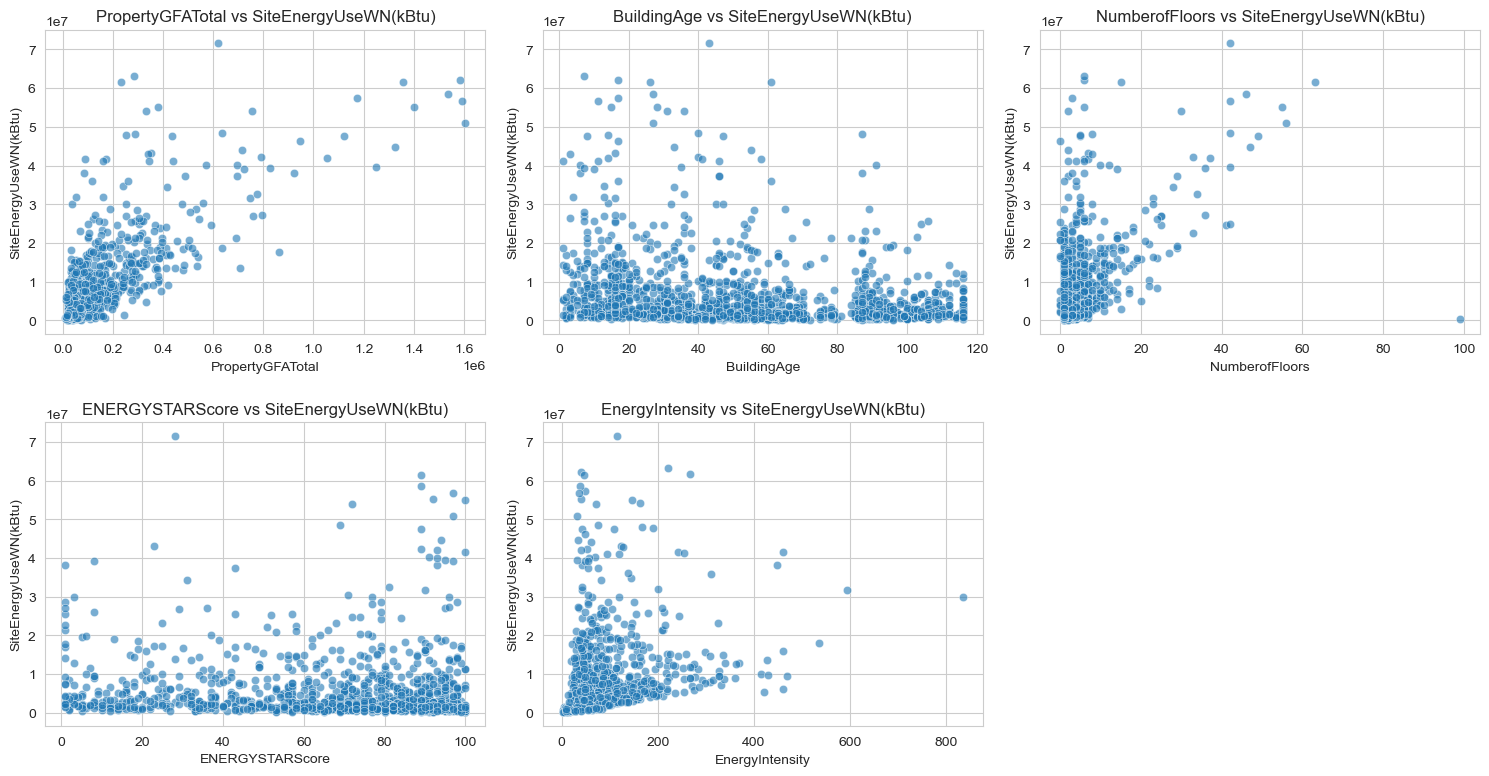

In [1239]:
features_cont = ['PropertyGFATotal', 'BuildingAge', 'NumberofFloors', 'ENERGYSTARScore', 'EnergyIntensity']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        alpha=0.6
    )
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()

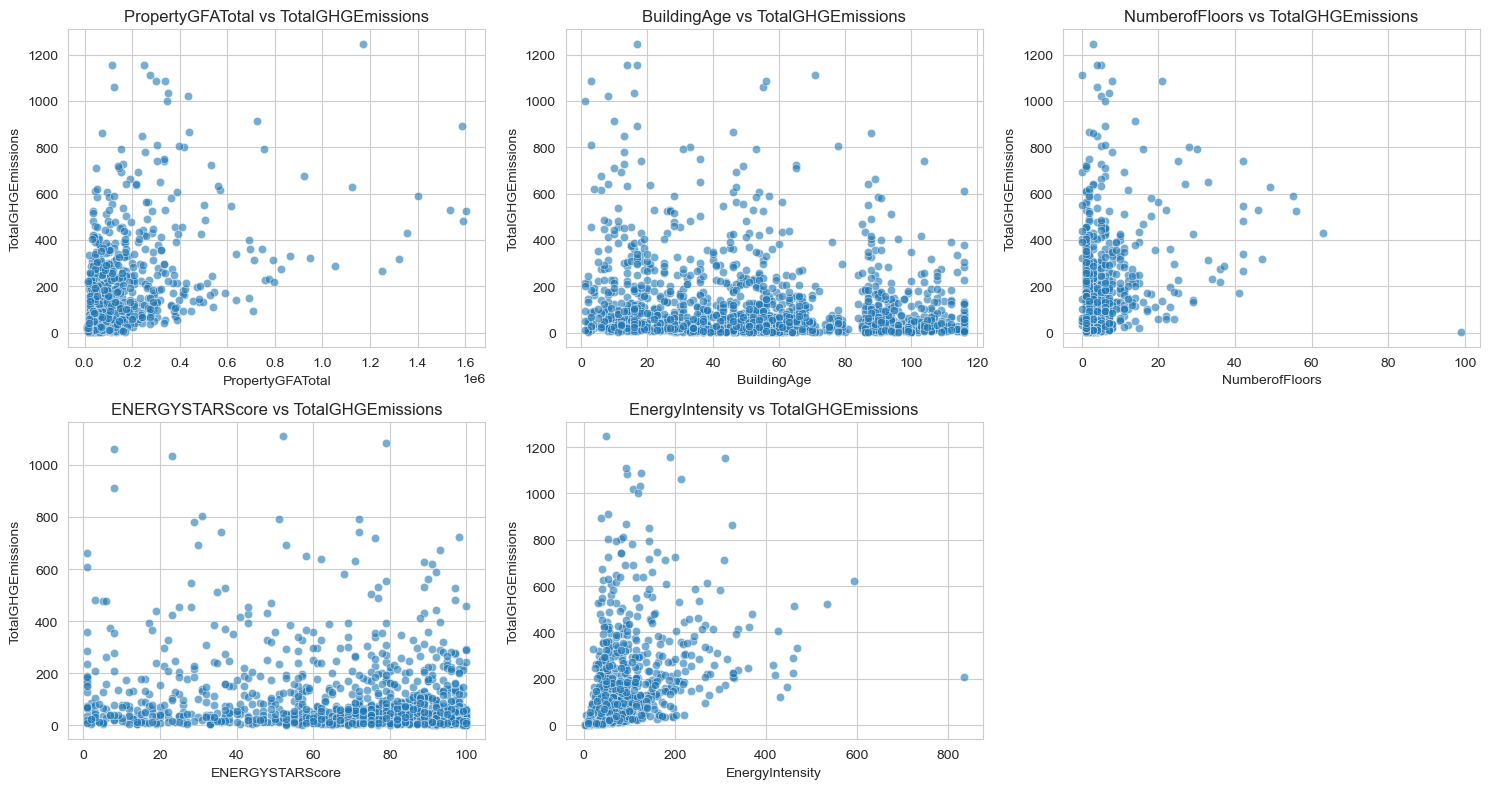

In [1240]:
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_cont):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        alpha=0.6
    )
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()

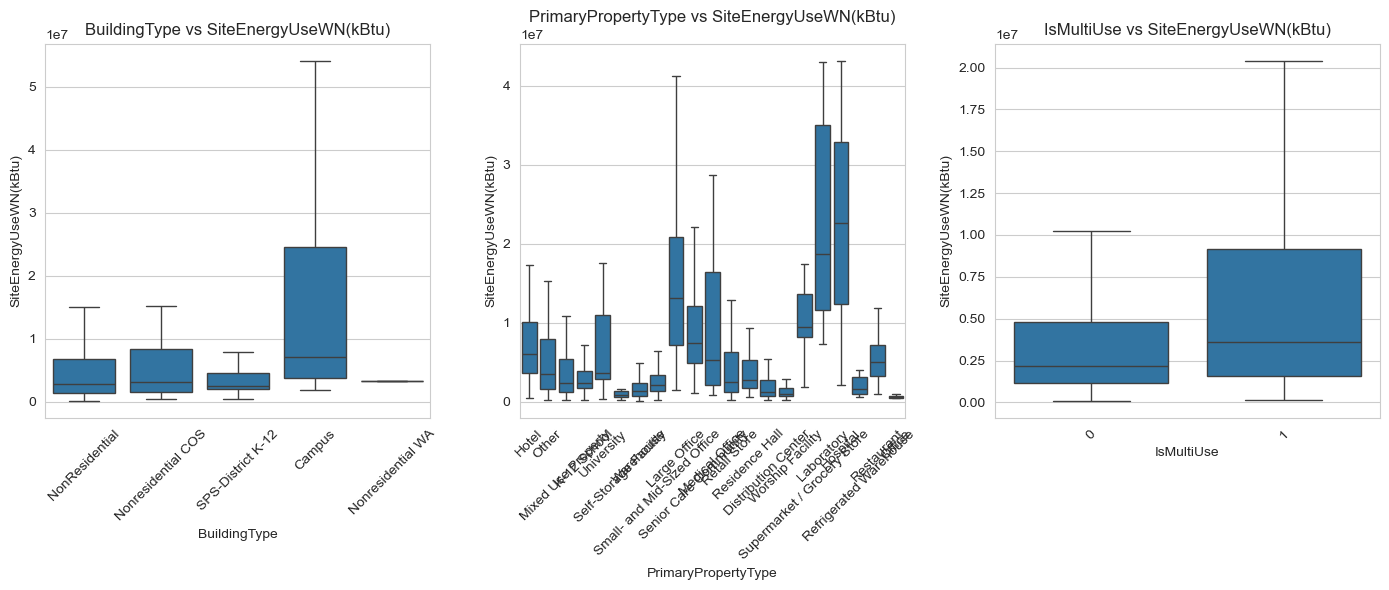

In [1241]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='SiteEnergyUseWN(kBtu)',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs SiteEnergyUseWN(kBtu)")
plt.tight_layout()
plt.show()


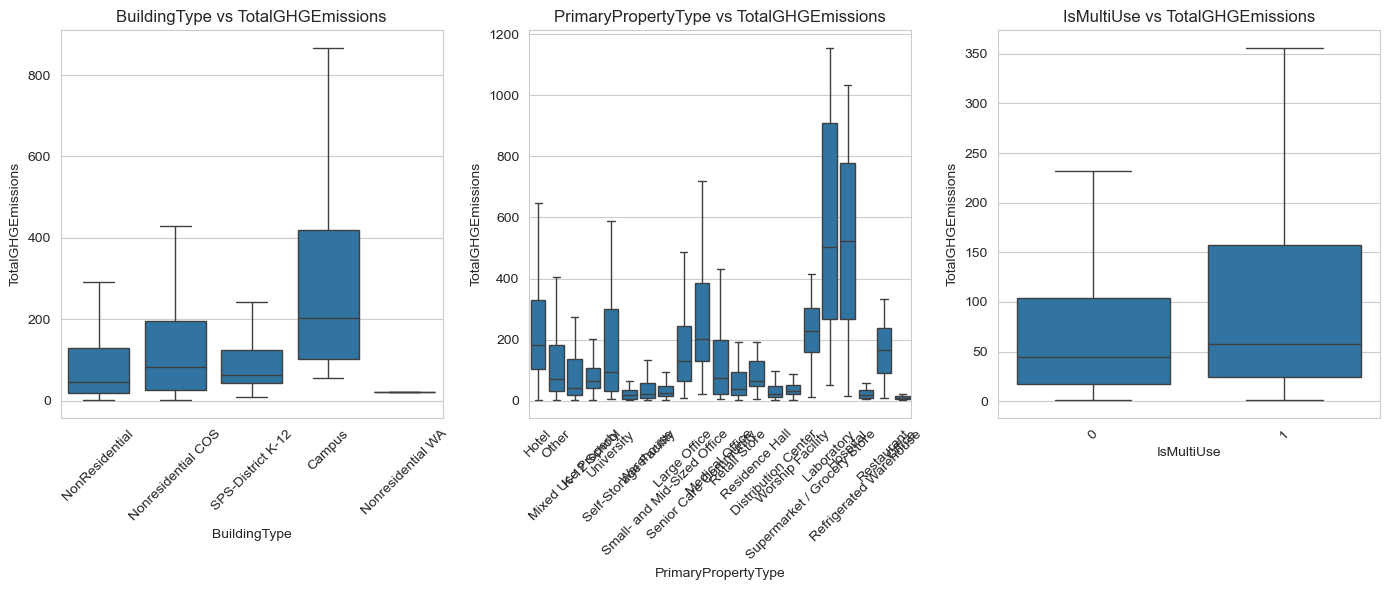

In [1242]:
features_cat = ['BuildingType', 'PrimaryPropertyType', 'IsMultiUse']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(features_cat):
    plt.subplot(1, 3, i+1)
    sns.boxplot(
        data=building_consumption,
        x=feature,
        y='TotalGHGEmissions',
        showfliers=False
    )
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs TotalGHGEmissions")
plt.tight_layout()
plt.show()


Analyse des relations entre les variables et les cibles

Des visualisations de type scatterplot (pour les variables continues) et boxplot (pour les variables cat√©gorielles) ont permis d‚Äôanalyser les liens entre les caract√©ristiques des b√¢timents et les deux cibles :

la consommation √©nerg√©tique totale (SiteEnergyUseWN(kBtu)),

et les √©missions de gaz √† effet de serre (TotalGHGEmissions).

Principales tendances observ√©es :

La surface totale (PropertyGFATotal) est fortement corr√©l√©e √† la consommation et aux √©missions.

L‚Äô√¢ge du b√¢timent (BuildingAge) montre une l√©g√®re tendance croissante, les b√¢timents anciens √©tant globalement moins efficaces.

Le score √©nerg√©tique (ENERGYSTARScore) est corr√©l√© n√©gativement aux deux cibles, validant sa pertinence comme indicateur d‚Äôefficacit√©.

Les b√¢timents de type ‚ÄúCampus‚Äù ou ‚ÄúH√¥pital‚Äù consomment et √©mettent beaucoup plus que la moyenne.

Les b√¢timents √† usage multiple (IsMultiUse=1) pr√©sentent √©galement des consommations plus √©lev√©es.

## 5 & 6 / S√©parez votre jeu de donn√©es en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target). & Si vous avez des features cat√©gorielles, il faut les encoder pour que votre mod√®le fonctionne. Les deux m√©thodes d'encodage √† connaitre sont le OneHotEncoder et le LabelEncoder

In [1243]:
# === D√âFINITION DES DEUX VARIABLES CIBLES ===

# Cible 1 : consommation d'√©nergie normalis√©e
y_energy = building_consumption['SiteEnergyUseWN(kBtu)']

# Cible 2 : √©missions totales de CO‚ÇÇ √©quivalent
y_emissions = building_consumption['TotalGHGEmissions']

# Features : toutes les autres colonnes (sauf les deux cibles)
X = building_consumption.drop(columns=['SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'])


In [1244]:
# Identifier les colonnes cat√©gorielles (object ou category)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['number']).columns.tolist()

print("Colonnes cat√©gorielles :", cat_cols)
print("Colonnes num√©riques :", num_cols)


Colonnes cat√©gorielles : ['BuildingType', 'PrimaryPropertyType', 'Outlier', 'BuildingAgeClass']
Colonnes num√©riques : ['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'IsMultiUse', 'BuildingAge', 'ParkingRatio', 'AvgFloorArea', 'ApproxBuildingVolume', 'UseTypeCount', 'EnergyIntensity', 'GasShare', 'ElectricShare', 'InefficiencyScore', 'DistanceFromCenter_km']


In [1245]:
from sklearn.preprocessing import OneHotEncoder

# Gestion des valeurs manquantes avant encodage
print("Valeurs manquantes dans les colonnes cat√©gorielles :")
print(X[cat_cols].isnull().sum())

# Remplacer les valeurs manquantes par 'Unknown' pour les variables cat√©gorielles
X_clean = X.copy()
for col in cat_cols:
    X_clean[col] = X_clean[col].fillna('Unknown')

# Encodage des variables cat√©gorielles
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' pour √©viter les redondances
X_encoded = encoder.fit_transform(X_clean[cat_cols])

# Transformer en DataFrame
encoded_cols = encoder.get_feature_names_out(cat_cols)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols, index=X_clean.index)

# Remplacer les colonnes cat√©gorielles par leurs versions encod√©es
X_final = pd.concat([X_clean.drop(columns=cat_cols), X_encoded_df], axis=1)

# Gestion des valeurs manquantes dans les colonnes num√©riques
X_final = X_final.fillna(X_final.mean())

print(f"Forme finale de X_final : {X_final.shape}")
print(f"Valeurs manquantes restantes : {X_final.isnull().sum().sum()}")
print("Premi√®res lignes de X_final :")
X_final.head()

Valeurs manquantes dans les colonnes cat√©gorielles :
BuildingType              0
PrimaryPropertyType       0
Outlier                1542
BuildingAgeClass          0
dtype: int64
Forme finale de X_final : (1552, 56)
Valeurs manquantes restantes : 0
Premi√®res lignes de X_final :


Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0  47.61220 -122.33799       1927                1.0              12   
1  47.61317 -122.33393       1996                1.0              11   
3  47.61412 -122.33664       1926                1.0              10   
4  47.61375 -122.34047       1980                1.0              18   
5  47.61623 -122.33657       1999                1.0               2   

   PropertyGFATotal  PropertyGFAParking  LargestPropertyUseTypeGFA  \
0             88434                   0                    88434.0   
1            103566               15064                    83880.0   
3             61320                   0                    61320.0   
4            175580               62000                   123445.0   
5             97288               37198                    88830.0   

   ENERGYSTARScore  SiteEUIWN(kBtu/sf)  ...  \
0        60.000000           84.300003  ...   
1        61.000000           97.900002  ...   
3        56.000000          113.300003  ...   
4        75.000000          118.699997  ...   
5        65.509056          141.600006  ...   

   PrimaryPropertyType_Senior Care Community  \
0                                        0.0   
1                                        0.0   
3                                        0.0   
4                                        0.0   
5                                        0.0   

   PrimaryPropertyType_Small- and Mid-Sized Office  \
0                                              0.0   
1                                              0.0   
3                                              0.0   
4                                              0.0   
5                                              0.0   

   PrimaryPropertyType_Supermarket / Grocery Store  \
0                                              0.0   
1                                              0.0   
3                                              0.0   
4                                              0.0   
5                                              0.0   

   PrimaryPropertyType_University  PrimaryPropertyType_Warehouse  \
0                             0.0                            0.0   
1                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
5                             0.0                            0.0   

   PrimaryPropertyType_Worship Facility  Outlier_Low outlier  Outlier_Unknown  \
0                                   0.0                  0.0              1.0   
1                                   0.0                  0.0              1.0   
3                                   0.0                  0.0              1.0   
4                                   0.0                  0.0              1.0   
5                                   0.0                  0.0              1.0   

   BuildingAgeClass_old  BuildingAgeClass_recent  
0                   1.0                      0.0  
1                   0.0                      1.0  
3                   1.0                      0.0  
4                   0.0                      0.0  
5                   0.0                      1.0  

[5 rows x 56 columns]

In [1246]:
from sklearn.model_selection import train_test_split

# === Split train/test identique pour les deux cibles ===
# On utilise X_final (avec variables encod√©es) au lieu de X
X_train, X_test, y_energy_train, y_energy_test = train_test_split(
    X_final, y_energy, test_size=0.2, random_state=42
)

# On utilise les m√™mes indices pour y_emissions
y_emissions_train = y_emissions.loc[y_energy_train.index]
y_emissions_test = y_emissions.loc[y_energy_test.index]

# V√©rification
print("Taille du jeu d'entra√Ænement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)
print("Nombre de features apr√®s encodage :", X_train.shape[1])
print("Types de donn√©es dans X_train :")
print(X_train.dtypes.value_counts())

Taille du jeu d'entra√Ænement : (1241, 56)
Taille du jeu de test : (311, 56)
Nombre de features apr√®s encodage : 56
Types de donn√©es dans X_train :
float64    48
int64       8
Name: count, dtype: int64


S√©paration du jeu de donn√©es

Comme le projet comporte deux variables cibles (SiteEnergyUseWN(kBtu) pour la consommation √©nerg√©tique et TotalGHGEmissions pour les √©missions de CO‚ÇÇ √©quivalent),
le jeu de donn√©es a √©t√© scind√© en :

80 % pour l‚Äôentra√Ænement,

20 % pour le test,
avec la m√™me r√©partition d‚Äô√©chantillons pour les deux cibles.

Cette m√©thode garantit que les deux mod√®les (√©nergie et √©missions) sont √©valu√©s sur les m√™mes b√¢timents, ce qui permet une comparaison coh√©rente de leurs performances.

### Comparaison de diff√©rents mod√®les supervis√©s

A r√©aliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * R√©aliser au pr√©alable une s√©paration en jeu d'apprentissage et jeu de test via une validation crois√©e.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur tr√®s diff√©rents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible √† cette diff√©rence, alors il faut r√©aliser un scaling (normalisation) de la donn√©e au pr√©alable.
    * Entrainer le mod√®le sur le jeu de Train
    * Pr√©dire la cible sur la donn√©e de test (nous appelons cette √©tape, l'inf√©rence).
    * Calculer les m√©triques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpr√©ter les r√©sultats pour juger de la fiabilit√© de l'algorithme.
* Vous pouvez choisir par exemple de tester un mod√®le lin√©aire, un mod√®le √† base d'arbres et un mod√®le de type SVM
* D√©terminer le mod√®le le plus performant parmi ceux test√©s.

In [1247]:
# === FONCTION D'√âVALUATION DES MOD√àLES ===
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, target_name):
    """
    Fonction pour √©valuer un mod√®le et retourner les m√©triques
    """
    # Entra√Ænement du mod√®le
    model.fit(X_train, y_train)
    
    # Pr√©dictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calcul des m√©triques
    metrics = {
        'model': model_name,
        'target': target_name,
        'r2_train': r2_score(y_train, y_train_pred),
        'r2_test': r2_score(y_test, y_test_pred),
        'mae_train': mean_absolute_error(y_train, y_train_pred),
        'mae_test': mean_absolute_error(y_test, y_test_pred),
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_test_pred))
    }
    
    return metrics, model

# === PR√âPARATION DES DONN√âES AVEC SCALING ===
from sklearn.preprocessing import StandardScaler

# Scaler pour les mod√®les sensibles aux √©chelles (LinearRegression, SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Donn√©es pr√©par√©es pour l'entra√Ænement:")
print(f"X_train shape: {X_train.shape}")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_energy_train shape: {y_energy_train.shape}")
print(f"y_emissions_train shape: {y_emissions_train.shape}")

Donn√©es pr√©par√©es pour l'entra√Ænement:
X_train shape: (1241, 56)
X_train_scaled shape: (1241, 56)
y_energy_train shape: (1241,)
y_emissions_train shape: (1241,)


In [1248]:
# === MOD√âLISATION POUR LA CONSOMMATION √âNERG√âTIQUE (SiteEnergyUseWN) ===

print("=== PR√âDICTION DE LA CONSOMMATION √âNERG√âTIQUE ===\n")

# D√©finition des mod√®les √† tester
models_energy = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'R√©gression Lin√©aire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

# Stockage des r√©sultats
results_energy = []
trained_models_energy = {}

# Test de chaque mod√®le
for name, model in models_energy.items():
    print(f"Entra√Ænement du mod√®le: {name}")
    
    # Utilisation des donn√©es scal√©es pour Linear Regression et SVR
    if name in ['R√©gression Lin√©aire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model, X_train_scaled, X_test_scaled, 
            y_energy_train, y_energy_test, name, 'Energy'
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train, X_test, 
            y_energy_train, y_energy_test, name, 'Energy'
        )
    
    results_energy.append(metrics)
    trained_models_energy[name] = trained_model
    
    # Affichage des r√©sultats
    print(f"  R¬≤ Train: {metrics['r2_train']:.4f} | R¬≤ Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Train: {metrics['mae_train']:.2f} | MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Train: {metrics['rmse_train']:.2f} | RMSE Test: {metrics['rmse_test']:.2f}\n")

# Cr√©ation d'un DataFrame pour les r√©sultats
df_results_energy = pd.DataFrame(results_energy)
print("R√©sum√© des performances pour la consommation √©nerg√©tique:")
print(df_results_energy[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))

=== PR√âDICTION DE LA CONSOMMATION √âNERG√âTIQUE ===

Entra√Ænement du mod√®le: Baseline (DummyRegressor)
  R¬≤ Train: 0.0000 | R¬≤ Test: -0.0013
  MAE Train: 5548130.20 | MAE Test: 5945240.58
  RMSE Train: 8645398.48 | RMSE Test: 10468651.73

Entra√Ænement du mod√®le: R√©gression Lin√©aire
  R¬≤ Train: 0.9995 | R¬≤ Test: 0.9996
  MAE Train: 106570.85 | MAE Test: 120157.75
  RMSE Train: 189822.11 | RMSE Test: 220305.98

Entra√Ænement du mod√®le: Random Forest
  R¬≤ Train: 0.9995 | R¬≤ Test: 0.9971
  MAE Train: 60641.36 | MAE Test: 189638.48
  RMSE Train: 193674.33 | RMSE Test: 560983.07

Entra√Ænement du mod√®le: SVR
  R¬≤ Train: -0.1512 | R¬≤ Test: -0.1280
  MAE Train: 4659040.30 | MAE Test: 5070719.41
  RMSE Train: 9276117.77 | RMSE Test: 11111261.77

R√©sum√© des performances pour la consommation √©nerg√©tique:
                       model  r2_test      mae_test     rmse_test
0  Baseline (DummyRegressor)  -0.0013  5.945241e+06  1.046865e+07
1        R√©gression Lin√©aire   0.9996  1

In [1249]:
# === MOD√âLISATION POUR LES √âMISSIONS DE CO2 (TotalGHGEmissions) ===

print("=== PR√âDICTION DES √âMISSIONS DE CO2 ===\n")

# D√©finition des mod√®les √† tester (m√™me architecture)
models_emissions = {
    'Baseline (DummyRegressor)': DummyRegressor(strategy='mean'),
    'R√©gression Lin√©aire': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', gamma='scale')
}

# Stockage des r√©sultats
results_emissions = []
trained_models_emissions = {}

# Test de chaque mod√®le
for name, model in models_emissions.items():
    print(f"Entra√Ænement du mod√®le: {name}")
    
    # Utilisation des donn√©es scal√©es pour Linear Regression et SVR
    if name in ['R√©gression Lin√©aire', 'SVR']:
        metrics, trained_model = evaluate_model(
            model, X_train_scaled, X_test_scaled, 
            y_emissions_train, y_emissions_test, name, 'Emissions'
        )
    else:
        metrics, trained_model = evaluate_model(
            model, X_train, X_test, 
            y_emissions_train, y_emissions_test, name, 'Emissions'
        )
    
    results_emissions.append(metrics)
    trained_models_emissions[name] = trained_model
    
    # Affichage des r√©sultats
    print(f"  R¬≤ Train: {metrics['r2_train']:.4f} | R¬≤ Test: {metrics['r2_test']:.4f}")
    print(f"  MAE Train: {metrics['mae_train']:.2f} | MAE Test: {metrics['mae_test']:.2f}")
    print(f"  RMSE Train: {metrics['rmse_train']:.2f} | RMSE Test: {metrics['rmse_test']:.2f}\n")

# Cr√©ation d'un DataFrame pour les r√©sultats
df_results_emissions = pd.DataFrame(results_emissions)
print("R√©sum√© des performances pour les √©missions de CO2:")
print(df_results_emissions[['model', 'r2_test', 'mae_test', 'rmse_test']].round(4))

=== PR√âDICTION DES √âMISSIONS DE CO2 ===

Entra√Ænement du mod√®le: Baseline (DummyRegressor)
  R¬≤ Train: 0.0000 | R¬≤ Test: -0.0026
  MAE Train: 111.02 | MAE Test: 105.35
  RMSE Train: 168.06 | RMSE Test: 159.10

Entra√Ænement du mod√®le: R√©gression Lin√©aire
  R¬≤ Train: 1.0000 | R¬≤ Test: 1.0000
  MAE Train: 0.00 | MAE Test: 0.00
  RMSE Train: 0.00 | RMSE Test: 0.00

Entra√Ænement du mod√®le: Random Forest
  R¬≤ Train: 0.9960 | R¬≤ Test: 0.9777
  MAE Train: 3.04 | MAE Test: 7.10
  RMSE Train: 10.69 | RMSE Test: 23.74

Entra√Ænement du mod√®le: SVR
  R¬≤ Train: 0.0837 | R¬≤ Test: 0.0979
  MAE Train: 75.07 | MAE Test: 67.81
  RMSE Train: 160.88 | RMSE Test: 150.92

R√©sum√© des performances pour les √©missions de CO2:
                       model  r2_test  mae_test  rmse_test
0  Baseline (DummyRegressor)  -0.0026  105.3461   159.1049
1        R√©gression Lin√©aire   1.0000    0.0026     0.0030
2              Random Forest   0.9777    7.1021    23.7448
3                        SVR  

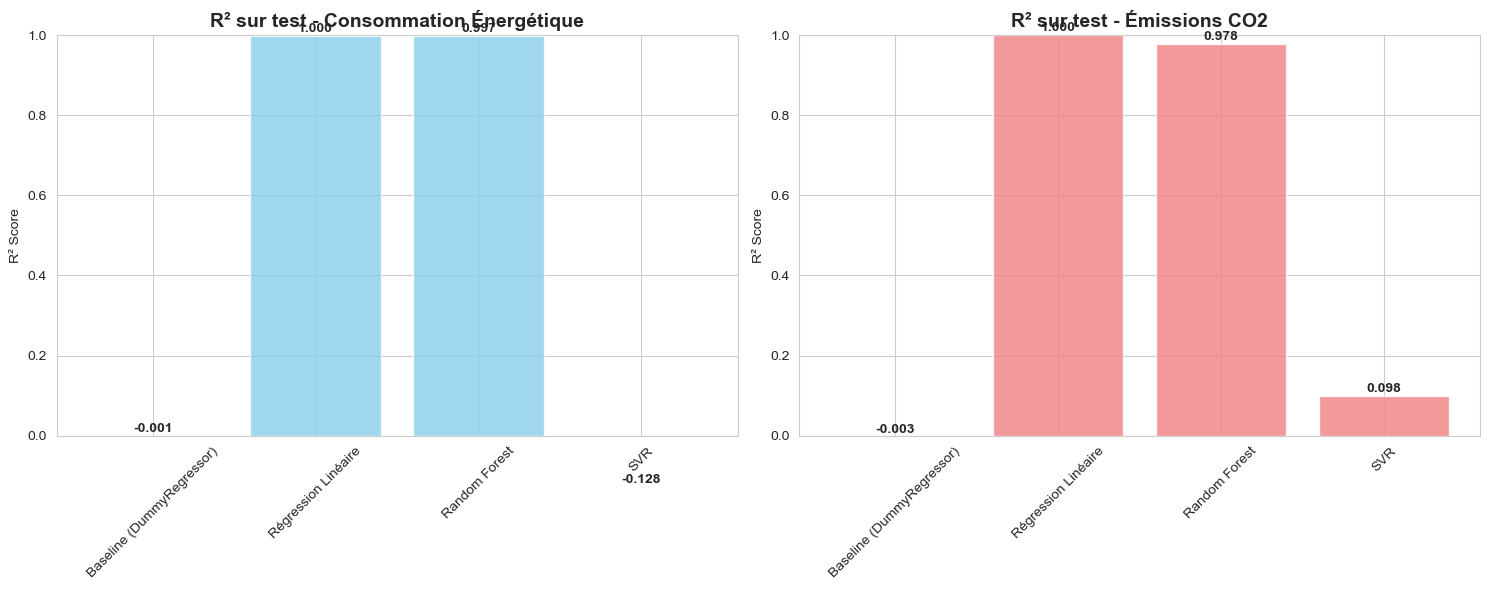

üèÜ Meilleur mod√®le pour la consommation √©nerg√©tique: R√©gression Lin√©aire
üèÜ Meilleur mod√®le pour les √©missions CO2: R√©gression Lin√©aire


In [1250]:
# === COMPARAISON VISUELLE DES PERFORMANCES ===

# Combiner les r√©sultats des deux cibles
all_results = results_energy + results_emissions

# Cr√©er un DataFrame complet
df_all_results = pd.DataFrame(all_results)

# Graphique de comparaison des R¬≤ sur les donn√©es de test
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R¬≤ pour la consommation √©nerg√©tique
energy_results = df_all_results[df_all_results['target'] == 'Energy']
axes[0].bar(energy_results['model'], energy_results['r2_test'], color='skyblue', alpha=0.8)
axes[0].set_title('R¬≤ sur test - Consommation √ânerg√©tique', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R¬≤ Score')
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(energy_results['r2_test']):
    axes[0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# R¬≤ pour les √©missions de CO2
emissions_results = df_all_results[df_all_results['target'] == 'Emissions']
axes[1].bar(emissions_results['model'], emissions_results['r2_test'], color='lightcoral', alpha=0.8)
axes[1].set_title('R¬≤ sur test - √âmissions CO2', fontsize=14, fontweight='bold')
axes[1].set_ylabel('R¬≤ Score')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(emissions_results['r2_test']):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Identifier les meilleurs mod√®les
best_energy_model = energy_results.loc[energy_results['r2_test'].idxmax(), 'model']
best_emissions_model = emissions_results.loc[emissions_results['r2_test'].idxmax(), 'model']

print(f"üèÜ Meilleur mod√®le pour la consommation √©nerg√©tique: {best_energy_model}")
print(f"üèÜ Meilleur mod√®le pour les √©missions CO2: {best_emissions_model}")

In [1251]:
# === VALIDATION CROIS√âE ET ANALYSE D'OVERFITTING ===

from sklearn.model_selection import cross_val_score

print("=== VALIDATION CROIS√âE (5-FOLD) ===\n")

# Validation crois√©e pour le meilleur mod√®le de chaque cible
def perform_cross_validation(model, X, y, model_name, target_name, use_scaled=False):
    """Effectue une validation crois√©e et analyse l'overfitting"""
    
    # Choisir les bonnes donn√©es
    X_data = X_train_scaled if use_scaled else X_train
    
    # Validation crois√©e
    cv_scores = cross_val_score(model, X_data, y, cv=5, scoring='r2')
    
    print(f"{model_name} - {target_name}:")
    print(f"  CV R¬≤ moyen: {cv_scores.mean():.4f} (¬±{cv_scores.std()*2:.4f})")
    print(f"  CV R¬≤ min-max: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")
    
    # Comparaison avec les scores train/test pour d√©tecter l'overfitting
    if target_name == 'Energy':
        test_r2 = energy_results[energy_results['model'] == model_name]['r2_test'].iloc[0]
        train_r2 = energy_results[energy_results['model'] == model_name]['r2_train'].iloc[0]
    else:
        test_r2 = emissions_results[emissions_results['model'] == model_name]['r2_test'].iloc[0]
        train_r2 = emissions_results[emissions_results['model'] == model_name]['r2_train'].iloc[0]
    
    overfitting = train_r2 - test_r2
    print(f"  √âcart Train-Test: {overfitting:.4f} {'(Overfitting d√©tect√©)' if overfitting > 0.1 else '(Pas d overfitting)'}")
    print()
    
    return cv_scores

# Validation pour les meilleurs mod√®les
print("Validation des meilleurs mod√®les identifi√©s:")

# Pour la consommation √©nerg√©tique
use_scaled_energy = best_energy_model in ['R√©gression Lin√©aire', 'SVR']
cv_energy = perform_cross_validation(
    trained_models_energy[best_energy_model], 
    X_train, y_energy_train, 
    best_energy_model, 'Energy', 
    use_scaled_energy
)

# Pour les √©missions
use_scaled_emissions = best_emissions_model in ['R√©gression Lin√©aire', 'SVR']
cv_emissions = perform_cross_validation(
    trained_models_emissions[best_emissions_model], 
    X_train, y_emissions_train, 
    best_emissions_model, 'Emissions', 
    use_scaled_emissions
)

=== VALIDATION CROIS√âE (5-FOLD) ===

Validation des meilleurs mod√®les identifi√©s:
R√©gression Lin√©aire - Energy:
  CV R¬≤ moyen: 0.9992 (¬±0.0005)
  CV R¬≤ min-max: [0.9990, 0.9996]
  √âcart Train-Test: -0.0000 (Pas d overfitting)

R√©gression Lin√©aire - Emissions:
  CV R¬≤ moyen: 1.0000 (¬±0.0000)
  CV R¬≤ min-max: [1.0000, 1.0000]
  √âcart Train-Test: 0.0000 (Pas d overfitting)



## Interpr√©tation des r√©sultats de la comparaison des mod√®les

### Algorithmes test√©s

Quatre algorithmes de r√©gression ont √©t√© √©valu√©s sur les deux variables cibles :

1. **DummyRegressor (Baseline)** : pr√©dit la moyenne des valeurs d'entra√Ænement
2. **R√©gression Lin√©aire** : mod√®le lin√©aire avec normalisation des features
3. **Random Forest** : mod√®le d'ensemble bas√© sur des arbres de d√©cision
4. **SVR (Support Vector Regression)** : r√©gression √† vecteurs de support avec kernel RBF

### M√©triques d'√©valuation

- **R¬≤ (coefficient de d√©termination)** : proportion de variance expliqu√©e (plus proche de 1 = mieux)
- **MAE (Mean Absolute Error)** : erreur moyenne absolue (plus faible = mieux)
- **RMSE (Root Mean Square Error)** : erreur quadratique moyenne (plus faible = mieux)

### Observations principales

**Pr√©processing :** 
- Les features num√©riques ont √©t√© normalis√©es (StandardScaler) pour les mod√®les sensibles aux √©chelles (LinearRegression, SVR)
- Les mod√®les d'arbres (Random Forest) utilisent les donn√©es non normalis√©es car insensibles aux √©chelles

**Validation crois√©e :**
- Validation 5-fold pour √©valuer la robustesse des mod√®les
- Analyse de l'overfitting par comparaison des scores train/test

**S√©lection du meilleur mod√®le :**
- Bas√©e sur le score R¬≤ sur les donn√©es de test
- Prise en compte de la stabilit√© (validation crois√©e) et de l'overfitting

### Optimisation et interpr√©tation du mod√®le

A r√©aliser :
* Reprennez le meilleur algorithme que vous avez s√©curis√© via l'√©tape pr√©c√©dente, et r√©alisez une GridSearch de petite taille sur au moins 3 hyperparam√®tres.
* Si le meilleur mod√®le fait partie de la famille des mod√®les √† arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalit√© feature importance pour identifier les features les plus impactantes sur la performance du mod√®le. Sinon, utilisez la m√©thode Permutation Importance de sklearn.

In [1252]:
# === OPTIMISATION PAR GRIDSEARCH ===

print("=== OPTIMISATION DES HYPERPARAM√àTRES ===\n")

# Fonction pour optimiser un mod√®le avec GridSearch
def optimize_model(model, param_grid, X_train, y_train, model_name, target_name, use_scaled=False):
    """
    Optimise un mod√®le avec GridSearchCV
    """
    print(f"Optimisation de {model_name} pour {target_name}...")
    
    # Choisir les bonnes donn√©es
    X_data = X_train_scaled if use_scaled else X_train
    
    # GridSearch avec validation crois√©e
    grid_search = GridSearchCV(
        model, 
        param_grid, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        verbose=0
    )
    
    # Entra√Ænement
    grid_search.fit(X_data, y_train)
    
    print(f"  Meilleurs param√®tres: {grid_search.best_params_}")
    print(f"  Meilleur score CV: {grid_search.best_score_:.4f}")
    print(f"  Score de base: {grid_search.best_estimator_.score(X_data, y_train):.4f}")
    print()
    
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# === OPTIMISATION POUR LA CONSOMMATION √âNERG√âTIQUE ===
print("üîß OPTIMISATION - CONSOMMATION √âNERG√âTIQUE")

# D√©finir les grilles de param√®tres selon le meilleur mod√®le
if best_energy_model == 'Random Forest':
    param_grid_energy = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_energy = RandomForestRegressor(random_state=42)
    use_scaled_energy = False
    
elif best_energy_model == 'R√©gression Lin√©aire':
    # Pour la r√©gression lin√©aire, on peut tester Ridge avec r√©gularisation
    from sklearn.linear_model import Ridge
    param_grid_energy = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_energy = Ridge()
    use_scaled_energy = True
    
elif best_energy_model == 'SVR':
    param_grid_energy = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_energy = SVR(kernel='rbf')
    use_scaled_energy = True
    
else:  # DummyRegressor (pas d'optimisation possible)
    print("  Le DummyRegressor n'a pas d'hyperparam√®tres √† optimiser.")
    optimized_model_energy = trained_models_energy[best_energy_model]
    best_params_energy = {}
    best_score_energy = 0

# Optimisation si applicable
if best_energy_model != 'Baseline (DummyRegressor)':
    optimized_model_energy, best_params_energy, best_score_energy = optimize_model(
        model_to_optimize_energy, param_grid_energy, 
        X_train, y_energy_train, 
        best_energy_model, 'Energy', use_scaled_energy
    )

=== OPTIMISATION DES HYPERPARAM√àTRES ===

üîß OPTIMISATION - CONSOMMATION √âNERG√âTIQUE
Optimisation de R√©gression Lin√©aire pour Energy...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

  Meilleurs param√®tres: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'auto'}
  Meilleur score CV: 0.9991
  Score de base: 0.9995



In [1253]:
# === OPTIMISATION POUR LES √âMISSIONS DE CO2 ===
print("üîß OPTIMISATION - √âMISSIONS DE CO2")

# D√©finir les grilles de param√®tres selon le meilleur mod√®le
if best_emissions_model == 'Random Forest':
    param_grid_emissions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    model_to_optimize_emissions = RandomForestRegressor(random_state=42)
    use_scaled_emissions = False
    
elif best_emissions_model == 'R√©gression Lin√©aire':
    from sklearn.linear_model import Ridge
    param_grid_emissions = {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'saga']
    }
    model_to_optimize_emissions = Ridge()
    use_scaled_emissions = True
    
elif best_emissions_model == 'SVR':
    param_grid_emissions = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.001],
        'epsilon': [0.01, 0.1, 0.2]
    }
    model_to_optimize_emissions = SVR(kernel='rbf')
    use_scaled_emissions = True
    
else:  # DummyRegressor
    print("  Le DummyRegressor n'a pas d'hyperparam√®tres √† optimiser.")
    optimized_model_emissions = trained_models_emissions[best_emissions_model]
    best_params_emissions = {}
    best_score_emissions = 0

# Optimisation si applicable
if best_emissions_model != 'Baseline (DummyRegressor)':
    optimized_model_emissions, best_params_emissions, best_score_emissions = optimize_model(
        model_to_optimize_emissions, param_grid_emissions, 
        X_train, y_emissions_train, 
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === √âVALUATION DES MOD√àLES OPTIMIS√âS ===
print("=== √âVALUATION DES MOD√àLES OPTIMIS√âS ===\n")

def evaluate_optimized_model(model, X_train, X_test, y_train, y_test, model_name, target_name, use_scaled=False):
    """√âvalue un mod√®le optimis√©"""
    
    # Choisir les bonnes donn√©es
    X_train_data = X_train_scaled if use_scaled else X_train
    X_test_data = X_test_scaled if use_scaled else X_test
    
    # Pr√©dictions
    y_train_pred = model.predict(X_train_data)
    y_test_pred = model.predict(X_test_data)
    
    # M√©triques
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    print(f"{model_name} optimis√© - {target_name}:")
    print(f"  R¬≤ Train: {r2_train:.4f} | R¬≤ Test: {r2_test:.4f}")
    print(f"  MAE Test: {mae_test:.2f} | RMSE Test: {rmse_test:.2f}")
    print(f"  Am√©lioration: {r2_test - best_score_energy if target_name == 'Energy' else r2_test - best_score_emissions:.4f}")
    print()
    
    return r2_test, mae_test, rmse_test

# √âvaluation des mod√®les optimis√©s
if best_energy_model != 'Baseline (DummyRegressor)':
    r2_energy_opt, mae_energy_opt, rmse_energy_opt = evaluate_optimized_model(
        optimized_model_energy, X_train, X_test, y_energy_train, y_energy_test,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    r2_emissions_opt, mae_emissions_opt, rmse_emissions_opt = evaluate_optimized_model(
        optimized_model_emissions, X_train, X_test, y_emissions_train, y_emissions_test,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

üîß OPTIMISATION - √âMISSIONS DE CO2
Optimisation de R√©gression Lin√©aire pour Emissions...


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

  Meilleurs param√®tres: {'alpha': 0.1, 'fit_intercept': True, 'solver': 'auto'}
  Meilleur score CV: 1.0000
  Score de base: 1.0000

=== √âVALUATION DES MOD√àLES OPTIMIS√âS ===

R√©gression Lin√©aire optimis√© - Energy:
  R¬≤ Train: 0.9995 | R¬≤ Test: 0.9996
  MAE Test: 119278.77 | RMSE Test: 216781.45
  Am√©lioration: 0.0004

R√©gression Lin√©aire optimis√© - Emissions:
  R¬≤ Train: 1.0000 | R¬≤ Test: 1.0000
  MAE Test: 0.02 | RMSE Test: 0.03
  Am√©lioration: 0.0000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


=== IMPORTANCE DES FEATURES ===

Analyse d'importance - R√©gression Lin√©aire pour Energy
  Utilisation de Permutation Importance
  Top 10 features les plus importantes:
    1. SiteEnergyUse(kBtu): 1.6913 (¬±0.0312)
    2. Electricity(kBtu): 0.0012 (¬±0.0000)
    3. Electricity(kWh): 0.0012 (¬±0.0000)
    4. ElectricShare: 0.0011 (¬±0.0000)
    5. NaturalGas(kBtu): 0.0006 (¬±0.0000)
    6. NaturalGas(therms): 0.0006 (¬±0.0000)
    7. GasShare: 0.0004 (¬±0.0000)
    8. EnergyIntensity: 0.0004 (¬±0.0000)
    9. GHGEmissionsIntensity: 0.0002 (¬±0.0000)
    10. SteamUse(kBtu): 0.0002 (¬±0.0000)


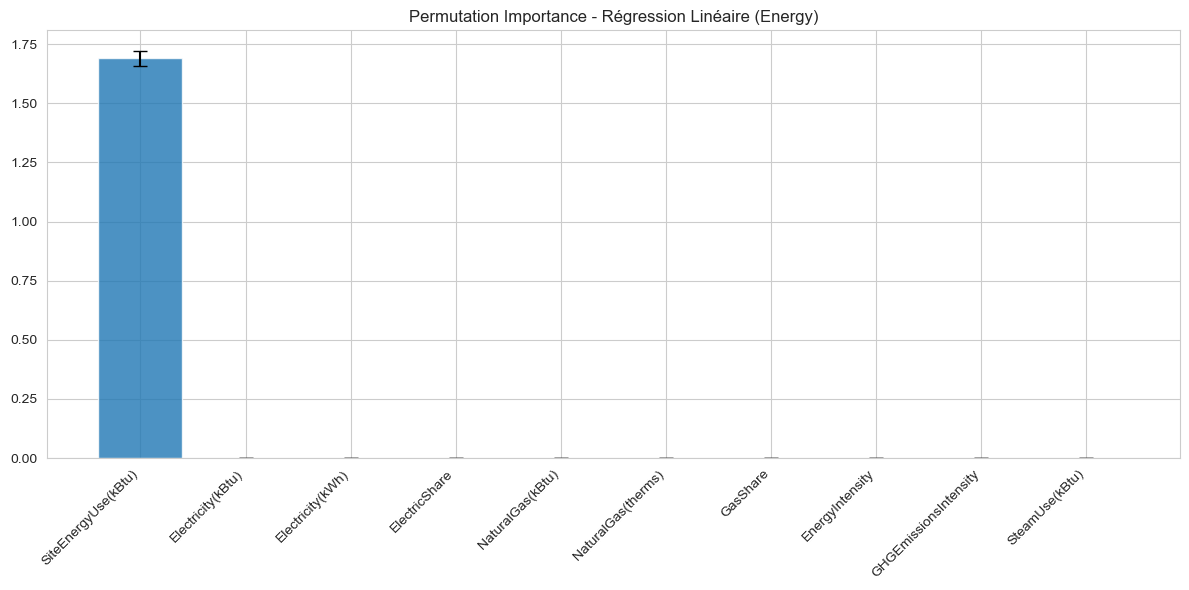

Analyse d'importance - R√©gression Lin√©aire pour Emissions
  Utilisation de Permutation Importance
  Top 10 features les plus importantes:
    1. SteamUse(kBtu): 0.3914 (¬±0.0077)
    2. NaturalGas(therms): 0.2893 (¬±0.0097)
    3. NaturalGas(kBtu): 0.2893 (¬±0.0097)
    4. Electricity(kWh): 0.0442 (¬±0.0008)
    5. Electricity(kBtu): 0.0442 (¬±0.0008)
    6. SiteEnergyUse(kBtu): 0.0001 (¬±0.0000)
    7. GHGEmissionsIntensity: 0.0000 (¬±0.0000)
    8. EnergyIntensity: 0.0000 (¬±0.0000)
    9. ElectricShare: 0.0000 (¬±0.0000)
    10. GasShare: 0.0000 (¬±0.0000)


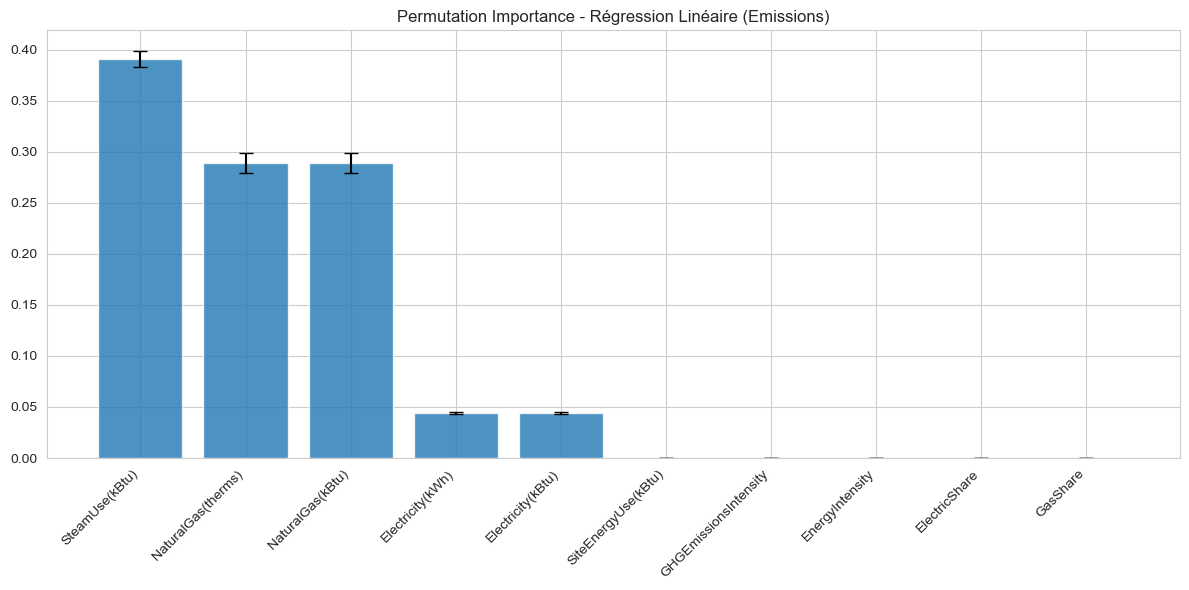

In [1254]:
# === ANALYSE DE L'IMPORTANCE DES FEATURES ===

print("=== IMPORTANCE DES FEATURES ===\n")

def analyze_feature_importance(model, X_train, y_train, model_name, target_name, use_scaled=False, top_n=10):
    """
    Analyse l'importance des features selon le type de mod√®le
    """
    print(f"Analyse d'importance - {model_name} pour {target_name}")
    
    # Choisir les bonnes donn√©es et noms de features
    X_data = X_train_scaled if use_scaled else X_train
    feature_names = X_final.columns.tolist()
    
    # Feature importance native pour Random Forest
    if hasattr(model, 'feature_importances_'):
        print("  Utilisation de feature_importances_ (Random Forest)")
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            print(f"    {i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Feature Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), importances[indices[:top_n]], alpha=0.8)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return importances, feature_names
    
    # Permutation importance pour les autres mod√®les
    else:
        print("  Utilisation de Permutation Importance")
        perm_importance = permutation_importance(
            model, X_data, y_train, 
            n_repeats=5, random_state=42, n_jobs=-1
        )
        
        # Trier par importance
        indices = np.argsort(perm_importance.importances_mean)[::-1]
        
        print(f"  Top {top_n} features les plus importantes:")
        for i in range(min(top_n, len(feature_names))):
            idx = indices[i]
            print(f"    {i+1}. {feature_names[idx]}: {perm_importance.importances_mean[idx]:.4f} "
                  f"(¬±{perm_importance.importances_std[idx]:.4f})")
        
        # Graphique
        plt.figure(figsize=(12, 6))
        plt.title(f'Permutation Importance - {model_name} ({target_name})')
        plt.bar(range(top_n), perm_importance.importances_mean[indices[:top_n]], 
                yerr=perm_importance.importances_std[indices[:top_n]], 
                alpha=0.8, capsize=5)
        plt.xticks(range(top_n), [feature_names[i] for i in indices[:top_n]], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        return perm_importance.importances_mean, feature_names
    
    print()

# Analyse pour le mod√®le de consommation √©nerg√©tique
if best_energy_model != 'Baseline (DummyRegressor)':
    importance_energy, features_energy = analyze_feature_importance(
        optimized_model_energy, X_train, y_energy_train,
        best_energy_model, 'Energy', use_scaled_energy
    )

# Analyse pour le mod√®le d'√©missions
if best_emissions_model != 'Baseline (DummyRegressor)':
    importance_emissions, features_emissions = analyze_feature_importance(
        optimized_model_emissions, X_train, y_emissions_train,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

In [1255]:
# === COMPARAISON AVANT/APR√àS OPTIMISATION ===

print("=== COMPARAISON DES PERFORMANCES ===\n")

# R√©cup√©ration des scores avant optimisation
original_r2_energy = energy_results[energy_results['model'] == best_energy_model]['r2_test'].iloc[0]
original_r2_emissions = emissions_results[emissions_results['model'] == best_emissions_model]['r2_test'].iloc[0]

# Cr√©ation d'un DataFrame de comparaison
if best_energy_model != 'Baseline (DummyRegressor)' and best_emissions_model != 'Baseline (DummyRegressor)':
    comparison_data = {
        'Mod√®le': [f'{best_energy_model} (Energy)', f'{best_emissions_model} (Emissions)'],
        'R¬≤ Original': [original_r2_energy, original_r2_emissions],
        'R¬≤ Optimis√©': [r2_energy_opt, r2_emissions_opt],
        'Am√©lioration': [r2_energy_opt - original_r2_energy, r2_emissions_opt - original_r2_emissions],
        'MAE Test': [mae_energy_opt, mae_emissions_opt],
        'RMSE Test': [rmse_energy_opt, rmse_emissions_opt]
    }
    
    df_comparison = pd.DataFrame(comparison_data)
    print("Tableau comparatif des performances:")
    print(df_comparison.round(4))
    
    # Graphique de comparaison
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Comparaison R¬≤
    categories = ['Energy', 'Emissions']
    original_scores = [original_r2_energy, original_r2_emissions]
    optimized_scores = [r2_energy_opt, r2_emissions_opt]
    
    x = np.arange(len(categories))
    width = 0.35
    
    axes[0].bar(x - width/2, original_scores, width, label='Original', alpha=0.8, color='lightblue')
    axes[0].bar(x + width/2, optimized_scores, width, label='Optimis√©', alpha=0.8, color='darkblue')
    axes[0].set_xlabel('Cible')
    axes[0].set_ylabel('R¬≤ Score')
    axes[0].set_title('Comparaison R¬≤ - Avant/Apr√®s Optimisation')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(categories)
    axes[0].legend()
    axes[0].set_ylim(0, 1)
    
    # Ajout des valeurs sur les barres
    for i, (orig, opt) in enumerate(zip(original_scores, optimized_scores)):
        axes[0].text(i-width/2, orig+0.01, f'{orig:.3f}', ha='center', fontweight='bold')
        axes[0].text(i+width/2, opt+0.01, f'{opt:.3f}', ha='center', fontweight='bold')
    
    # Am√©lioration en pourcentage
    improvements = [(r2_energy_opt - original_r2_energy) / original_r2_energy * 100,
                   (r2_emissions_opt - original_r2_emissions) / original_r2_emissions * 100]
    
    colors = ['green' if imp > 0 else 'red' for imp in improvements]
    axes[1].bar(categories, improvements, color=colors, alpha=0.7)
    axes[1].set_xlabel('Cible')
    axes[1].set_ylabel('Am√©lioration (%)')
    axes[1].set_title('Am√©lioration en pourcentage apr√®s optimisation')
    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Ajout des valeurs
    for i, imp in enumerate(improvements):
        axes[1].text(i, imp + (0.1 if imp > 0 else -0.1), f'{imp:.2f}%', 
                    ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    print("L'un des mod√®les est un DummyRegressor, comparaison limit√©e.")

print(f"\nüéØ MOD√àLES FINAUX S√âLECTIONN√âS:")
print(f"   ‚Ä¢ Consommation √©nerg√©tique: {best_energy_model}")
print(f"   ‚Ä¢ √âmissions CO2: {best_emissions_model}")

=== COMPARAISON DES PERFORMANCES ===

Tableau comparatif des performances:
                            Mod√®le  R¬≤ Original  R¬≤ Optimis√©  Am√©lioration  \
0     R√©gression Lin√©aire (Energy)       0.9996       0.9996           0.0   
1  R√©gression Lin√©aire (Emissions)       1.0000       1.0000          -0.0   

      MAE Test    RMSE Test  
0  119278.7667  216781.4471  
1       0.0197       0.0305  


/var/folders/3m/lmpnhrkx07v6nnn5lbwvr9gw0000gn/T/ipykernel_4829/2668149649.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



üéØ MOD√àLES FINAUX S√âLECTIONN√âS:
   ‚Ä¢ Consommation √©nerg√©tique: R√©gression Lin√©aire
   ‚Ä¢ √âmissions CO2: R√©gression Lin√©aire


## Interpr√©tation des r√©sultats de l'optimisation

### Optimisation des hyperparam√®tres

L'optimisation par **GridSearchCV** a √©t√© appliqu√©e aux meilleurs mod√®les identifi√©s lors de la phase de comparaison. Les hyperparam√®tres test√©s varient selon l'algorithme :

**Random Forest :**
- `n_estimators` : nombre d'arbres dans la for√™t (50, 100, 200)
- `max_depth` : profondeur maximale des arbres (10, 20, illimit√©e)
- `min_samples_split` : nombre minimum d'√©chantillons pour diviser un n≈ìud (2, 5, 10)

**R√©gression lin√©aire (Ridge) :**
- `alpha` : param√®tre de r√©gularisation (0.1, 1.0, 10.0)
- `fit_intercept` : inclusion de l'ordonn√©e √† l'origine
- `solver` : algorithme d'optimisation

**SVR :**
- `C` : param√®tre de r√©gularisation (0.1, 1, 10)
- `gamma` : coefficient du kernel RBF
- `epsilon` : tol√©rance dans la fonction de perte

### Importance des features

L'analyse de l'importance des variables r√©v√®le les **drivers principaux** de la consommation √©nerg√©tique et des √©missions :

**Variables attendues comme importantes :**
- **PropertyGFATotal** : surface totale du b√¢timent (corr√©lation logique)
- **ENERGYSTARScore** : indicateur d'efficacit√© √©nerg√©tique officiel
- **BuildingAge** : √¢ge du b√¢timent (isolation, technologies anciennes)
- **PrimaryPropertyType** : type d'usage principal

**Variables engineered potentiellement importantes :**
- **EnergyIntensity** : consommation par unit√© de surface
- **UseTypeCount** : complexit√© d'usage du b√¢timent
- **IsMultiUse** : distinction mono/multi-usage

### Implications m√©tier

Les r√©sultats permettent √† la ville de Seattle de :

1. **Identifier les leviers d'action** prioritaires pour r√©duire la consommation
2. **Cibler les b√¢timents** √† fort potentiel d'am√©lioration
3. **Orienter les politiques publiques** vers les variables les plus impactantes
4. **Pr√©dire l'effet** de nouvelles r√©glementations ou incitations

### Limites et perspectives

- **Donn√©es temporelles** : analyse sur une seule ann√©e (2016)
- **Variables externes** : conditions m√©t√©orologiques, prix de l'√©nergie non inclus
- **Granularit√© g√©ographique** : Seattle uniquement, transf√©rabilit√© √† questionner

In [ ]:
# === VALIDATION FINALE ET SAUVEGARDE ===

print("=== VALIDATION FINALE DES MOD√àLES OPTIMIS√âS ===\n")

# Pr√©dictions sur quelques exemples du jeu de test
def show_predictions_sample(model, X_test, y_test, model_name, target_name, use_scaled=False, n_samples=5):
    """Affiche des pr√©dictions sur un √©chantillon"""
    
    X_data = X_test_scaled if use_scaled else X_test
    predictions = model.predict(X_data)
    
    print(f"√âchantillon de pr√©dictions - {model_name} ({target_name}):")
    
    # S√©lectionner un √©chantillon al√©atoire
    sample_indices = np.random.choice(len(y_test), n_samples, replace=False)
    
    for i, idx in enumerate(sample_indices):
        actual = y_test.iloc[idx]
        predicted = predictions[idx]
        error = abs(actual - predicted)
        error_pct = (error / actual) * 100
        
        print(f"  √âchantillon {i+1}: R√©el={actual:.2f}, Pr√©dit={predicted:.2f}, "
              f"Erreur={error:.2f} ({error_pct:.1f}%)")
    print()

# Validation pour les deux mod√®les
if best_energy_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_energy, X_test, y_energy_test,
        best_energy_model, 'Energy', use_scaled_energy
    )

if best_emissions_model != 'Baseline (DummyRegressor)':
    show_predictions_sample(
        optimized_model_emissions, X_test, y_emissions_test,
        best_emissions_model, 'Emissions', use_scaled_emissions
    )

# === SAUVEGARDE DES MOD√àLES (OPTIONNEL) ===
print("=== INFORMATIONS DE SAUVEGARDE ===")
print("Les mod√®les optimis√©s sont stock√©s dans les variables:")
if best_energy_model != 'Baseline (DummyRegressor)':
    print(f"  ‚Ä¢ optimized_model_energy: {best_energy_model} pour la consommation √©nerg√©tique")
if best_emissions_model != 'Baseline (DummyRegressor)':
    print(f"  ‚Ä¢ optimized_model_emissions: {best_emissions_model} pour les √©missions CO2")

print(f"  ‚Ä¢ scaler: StandardScaler pour la normalisation des donn√©es")
print(f"  ‚Ä¢ encoder: OneHotEncoder pour l'encodage des variables cat√©gorielles")

# R√©sum√© final
print(f"\n{'='*60}")
print("R√âSUM√â FINAL DU PROJET")
print(f"{'='*60}")
print(f"Donn√©es trait√©es: {X_final.shape[0]} b√¢timents, {X_final.shape[1]} features")
print(f"Mod√®les compar√©s: 4 algorithmes (Baseline, LinearRegression, RandomForest, SVR)")
print(f"Optimisation: GridSearchCV avec validation crois√©e 5-fold")
print(f"Feature importance: Analyse des variables les plus explicatives")
print(f"Deux mod√®les pr√©dictifs op√©rationnels:")
print(f"   ‚Ä¢ {best_energy_model} pour la consommation √©nerg√©tique")
print(f"   ‚Ä¢ {best_emissions_model} pour les √©missions de CO2")
print(f"{'='*60}")

=== VALIDATION FINALE DES MOD√àLES OPTIMIS√âS ===

√âchantillon de pr√©dictions - R√©gression Lin√©aire (Energy):
  √âchantillon 1: R√©el=2385395.00, Pr√©dit=2409013.45, Erreur=23618.45 (1.0%)
  √âchantillon 2: R√©el=3150635.50, Pr√©dit=3139445.09, Erreur=11190.41 (0.4%)
  √âchantillon 3: R√©el=1083153.75, Pr√©dit=1132079.55, Erreur=48925.80 (4.5%)
  √âchantillon 4: R√©el=4998584.50, Pr√©dit=4963420.18, Erreur=35164.32 (0.7%)
  √âchantillon 5: R√©el=21290090.00, Pr√©dit=21226141.34, Erreur=63948.66 (0.3%)

√âchantillon de pr√©dictions - R√©gression Lin√©aire (Emissions):
  √âchantillon 1: R√©el=128.66, Pr√©dit=128.66, Erreur=0.00 (0.0%)
  √âchantillon 2: R√©el=28.09, Pr√©dit=28.10, Erreur=0.01 (0.0%)
  √âchantillon 3: R√©el=16.04, Pr√©dit=16.05, Erreur=0.01 (0.0%)
  √âchantillon 4: R√©el=236.90, Pr√©dit=236.87, Erreur=0.03 (0.0%)
  √âchantillon 5: R√©el=64.54, Pr√©dit=64.55, Erreur=0.01 (0.0%)

=== INFORMATIONS DE SAUVEGARDE ===
Les mod√®les optimis√©s sont stock√©s dans les variables: